# importing packages

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
from pandas import DataFrame
import pylab as pl
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz
%matplotlib inline

# setting directory

In [3]:
os.chdir(r"C:\Users\PC\Desktop\Machine Learning\Datasets")

NameError: name 'os' is not defined

In [3]:
df = pd.read_csv("petrol_consumption.csv")

In [4]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [6]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [7]:
df.shape

(48, 5)

In [8]:
pd.options.display.float_format = '{:.4f}'.format
data_summary=df.describe()
data_summary.T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0000,7.6683,0.9508,5.0000,7.0000,7.5000,8.1250,10.0000
Average_income,48.0000,4241.8333,573.6238,3063.0000,3739.0000,4298.0000,4578.7500,5342.0000
Paved_Highways,48.0000,5565.4167,3491.5072,431.0000,3110.2500,4735.5000,7156.0000,17782.0000
Population_Driver_licence(%),48.0000,0.5703,0.0555,0.4510,0.5298,0.5645,0.5952,0.7240
Petrol_Consumption,48.0000,576.7708,111.8858,344.0000,509.5000,568.5000,632.7500,968.0000


In [9]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.0000,48.0000,48.0000,48.0000,48.0000
mean,7.6683,4241.8333,5565.4167,0.5703,576.7708
std,0.9508,573.6238,3491.5072,0.0555,111.8858
min,5.0000,3063.0000,431.0000,0.4510,344.0000
25%,7.0000,3739.0000,3110.2500,0.5298,509.5000
50%,7.5000,4298.0000,4735.5000,0.5645,568.5000
75%,8.1250,4578.7500,7156.0000,0.5952,632.7500
max,10.0000,5342.0000,17782.0000,0.7240,968.0000


In [10]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Petrol_tax outliers = 4.17%
Column Average_income outliers = 0.00%
Column Paved_Highways outliers = 4.17%
Column Population_Driver_licence(%) outliers = 2.08%
Column Petrol_Consumption outliers = 4.17%


<Axes: >

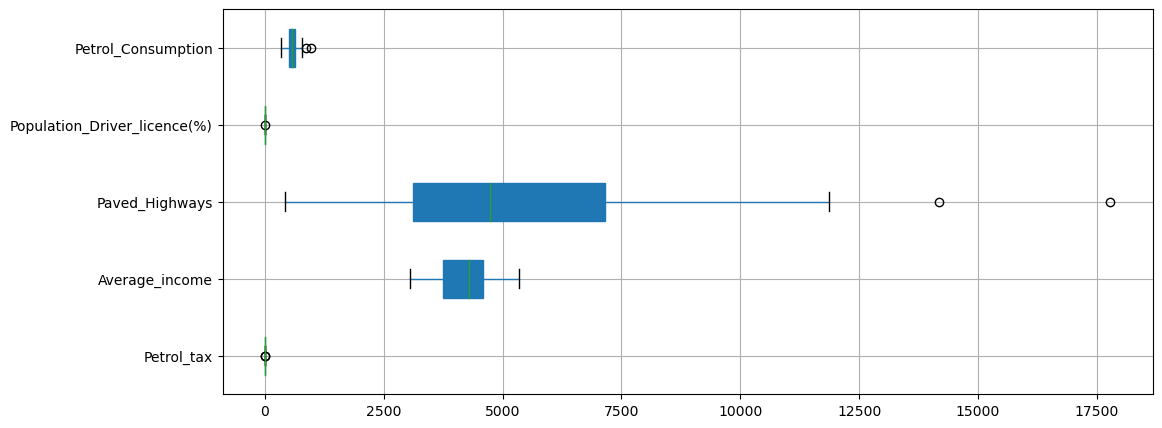

In [11]:
plt.figure(figsize=(12,5))
df.boxplot(patch_artist=True,vert=False)

In [12]:
my_corr=df.corr()
my_corr

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.0000,0.0127,-0.5221,-0.2880,-0.4513
Average_income,0.0127,1.0000,0.0502,0.1571,-0.2449
Paved_Highways,-0.5221,0.0502,1.0000,-0.0641,0.0190
Population_Driver_licence(%),-0.2880,0.1571,-0.0641,1.0000,0.6990
Petrol_Consumption,-0.4513,-0.2449,0.0190,0.6990,1.0000


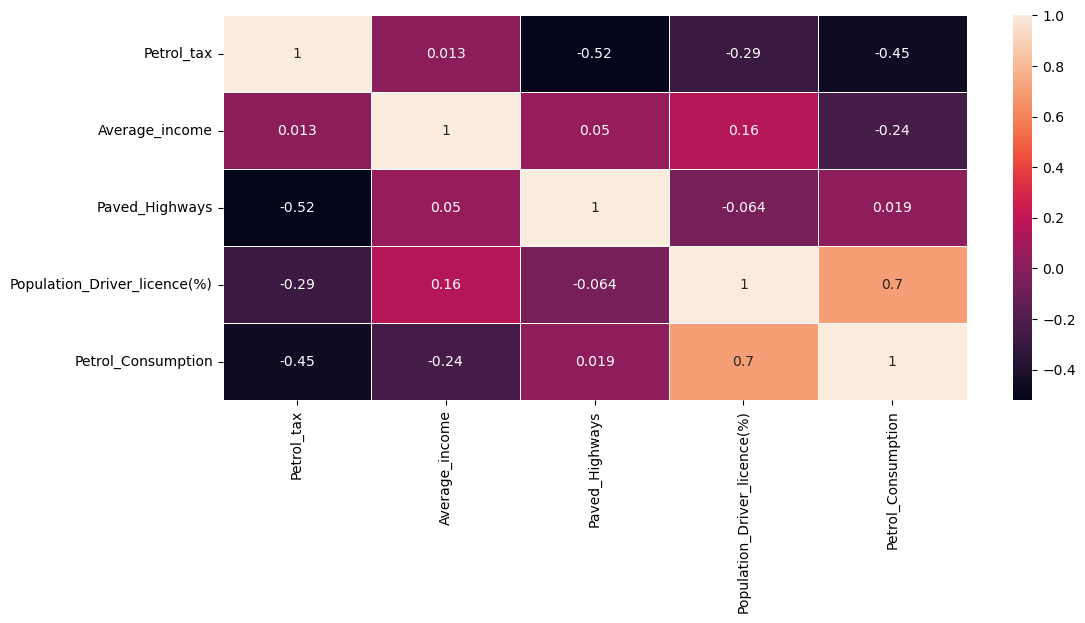

In [13]:
plt.figure(figsize=(12,5))
sns.heatmap(my_corr,linewidth=0.5,annot=True)
plt.show()

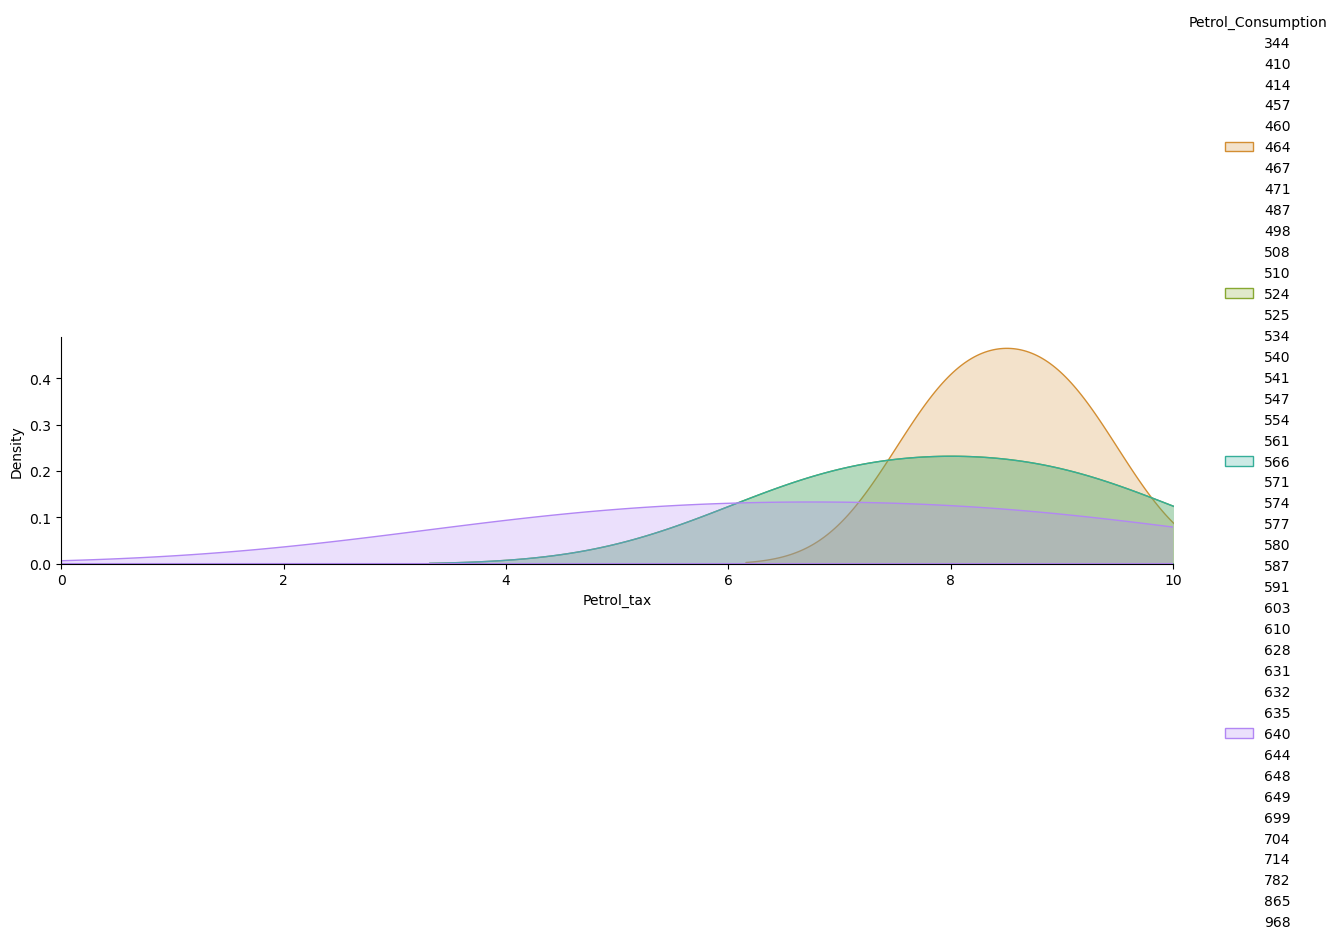

In [14]:
a = sns.FacetGrid(df, hue = 'Petrol_Consumption', aspect=4 )
a.map(sns.kdeplot, 'Petrol_tax', shade= True )
a.set(xlim=(0 ,df['Petrol_tax'].max()))
a.add_legend()

In [2]:
#axes = sns.factorplot('Petrol_tax','Paved_Highways',data=df, aspect = 2.5, )

In [16]:
predictor_var= df[['Petrol_tax','Average_income','Paved_Highways','Population_Driver_licence(%)']] 
#all columns except the last one
target_var= df['Petrol_Consumption'] 
#only the last column

In [17]:
x_train, x_test, y_train, y_test = train_test_split(predictor_var,target_var, test_size=0.30, random_state=123)

In [18]:
print("shape of x_train :",x_train.shape)
print("shape of x_test :",x_test.shape)

shape of x_train : (33, 4)
shape of x_test : (15, 4)


In [19]:
tree = DecisionTreeRegressor(max_depth=5,max_features=4)
tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features=4)

In [20]:
predictions = tree.predict(x_test)

In [21]:
fuel = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
df.head(5)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0000,3571,1976,0.5250,541
1,9.0000,4092,1250,0.5720,524
2,9.0000,3865,1586,0.5800,561
3,7.5000,4870,2351,0.5290,414
4,8.0000,4399,431,0.5440,410


In [22]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error :', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error :', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('r2_score :', metrics.r2_score(y_test,predictions))

Mean Absolute Error : 95.26666666666667
Mean Squared Error : 17951.192592592593
Root Mean Squared Error : 133.98206071184526
r2_score : 0.22335591532573262


In [23]:
tree.feature_importances_
pd.Series(tree.feature_importances_,index=predictor_var.columns).sort_values(ascending=False)

Petrol_tax                     0.3295
Average_income                 0.2706
Paved_Highways                 0.2524
Population_Driver_licence(%)   0.1475
dtype: float64

In [24]:
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=predictor_var.columns, out_file=None)

In [1]:
#graphviz.sources.Source(dot_data)